In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.head())
print(iris.tail())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = iris.iloc[:, :4].values
y = iris.iloc[:, 4].values
print(y[:5])
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1[:5])
y2 = pd.get_dummies(y1).values
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [6]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

#모델 생성
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
#모델 학습
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.2403 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0562 - accuracy: 0.3417
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9875 - accuracy: 0.5250
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9389 - accuracy: 0.4583
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8863 - accuracy: 0.8000
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.6750
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8031 - accuracy: 0.6667
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7585 - accuracy: 0.6667
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7112 - accuracy: 0.7167
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6714 - accuracy: 0.8250
Epoch 11/100
4/4 [===========

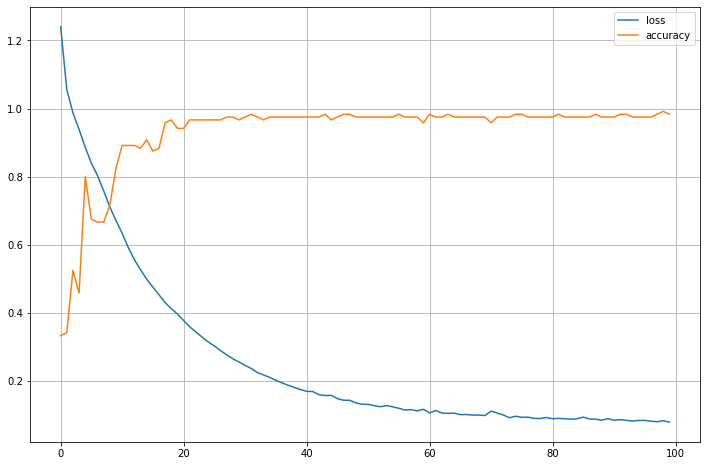

In [8]:
import matplotlib.pyplot as plt
#그래프 출력
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [9]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("정확도 = {:.2f}".format(accuracy))

정확도 = 0.97


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
print(pred[:10])
y_test_class = np.argmax(y_test, axis=1)
pred_class = np.argmax(pred, axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class, pred_class))

[[1.4205795e-03 8.2002443e-01 1.7855501e-01]
 [9.9705184e-01 2.9465852e-03 1.5609107e-06]
 [1.2236887e-03 4.8351651e-01 5.1525980e-01]
 [3.5484490e-04 3.9891955e-01 6.0072559e-01]
 [1.6326027e-02 9.7568136e-01 7.9926280e-03]
 [3.8708742e-05 7.3385954e-02 9.2657530e-01]
 [9.9503195e-01 4.9634497e-03 4.6310561e-06]
 [6.9328630e-06 8.4803235e-03 9.9151272e-01]
 [6.6330977e-06 8.5166395e-03 9.9147671e-01]
 [9.9979526e-01 2.0472913e-04 2.5636597e-08]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [11]:
model.save('c:/data/iris/iris_keras.model')

INFO:tensorflow:Assets written to: c:/data/iris/iris_keras.model\assets
